# Number of word occurences in text

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import os
from collections import defaultdict
from scipy.special import factorial

In [2]:
os.listdir()

['.ipynb_checkpoints', 'bible.txt', 'example.ipynb']

### extracting data from text into a cohesive dataframe

In [3]:
# we'll use punctiation string to remove all puctuation and numbers from the text
string.punctuation + '0123456789'

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~0123456789'

In [4]:
# translator is a tool that allows us for easy removal of the unwanted characters
translator = str.maketrans('','',string.punctuation + '0123456789')

In [5]:
# let's create an array of all distinct words in the text
fp = open('bible.txt')
bible = fp.read()
fp.close()
bible= bible.translate(translator).lower().split()

In [6]:
# let's create a dictionary and use it to count the number of occurences for each word
unique_words = defaultdict(lambda: 0)
for word in bible:
    unique_words[word] += 1

In [7]:
# all words in descending order with respect to the number of their occurences
sorted_words = sorted(list(unique_words.items()),key=lambda x: x[1],reverse=True)

In [8]:
# creating a pandas dataframe
all_words = pd.DataFrame(sorted_words, columns = ['Words', 'Occurences'])
all_words['Words'] = all_words['Words'].astype('string')

In [9]:
all_words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12733 entries, 0 to 12732
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Words       12733 non-null  string
 1   Occurences  12733 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 199.1 KB


In [10]:
# it might be worth to include the length of each word in the dataframe might
all_words['Length'] = all_words['Words'].str.len()

In [11]:
all_words.head(8)

,Words,Occurences,Length
0,the,63924,3
1,and,51696,3
2,of,34734,2
3,to,13561,2
4,that,12913,4
5,in,12667,2
6,he,10420,2
7,shall,9838,5


### experimentation (having fun)

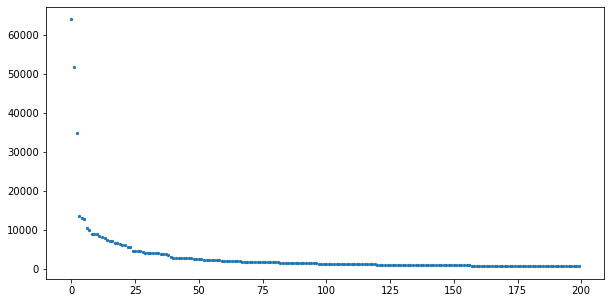

In [12]:
# we can see that the distribution follows the zipf's law
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(200), all_words['Occurences'][:200],s = 5)

In [13]:
# we can extract the words that start with vowels and consonants(this is done for fun)
vowels = all_words[ all_words['Words'].str[0].isin(['a','e','i','o','u','y']) ]
consonants = all_words[ ~all_words['Words'].str[0].isin(['a','e','i','o','u','y']) ]

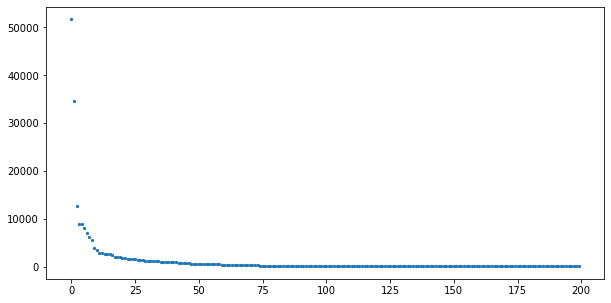

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(200), vowels['Occurences'][:200],s = 5)

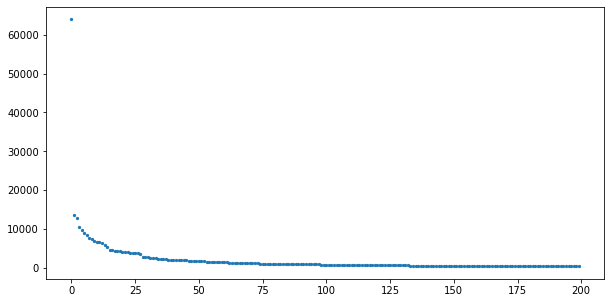

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(200), consonants['Occurences'][:200],s = 5)

In [16]:
# what's the length of the longest word in the text
max_word_length = all_words['Length'].max()
max_word_length

18

In [17]:
# interesting
# now let's extract information about how many words of each length appear in the text
occurance_no = all_words.groupby(['Length'])['Occurences'].sum()
occurance_no.index.name= None
occurance_no.name = 'Occurance'
occurance_no = occurance_no.reindex(list(range(1,max_word_length+1)), fill_value=0)
occurance_no.head(8)

1     18096
2    130962
3    222307
4    180035
5     98253
6     61090
7     45531
8     27749
Name: Occurance, dtype: int64

In [18]:
# what if we consider only the fact that the word occurs instead of the number of 
instance_no = all_words['Length'].value_counts()
instance_no.name = 'Instance'
instance_no = instance_no.reindex(list(range(1,max_word_length+1)), fill_value=0)
instance_no.head(8)

1       3
2      39
3     309
4    1100
5    1744
6    2224
7    2236
8    1820
Name: Instance, dtype: Int64

In [19]:
# what are their means??
print((occurance_no.index*occurance_no).sum()/occurance_no.sum())
print((instance_no.index*instance_no).sum()/instance_no.sum())

4.180129920593255
7.109793450090317


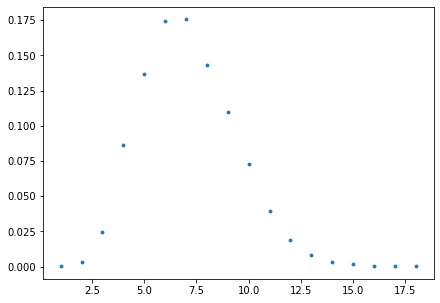

In [20]:
# how does the distrubution of wor instances look?
plt.figure(figsize=(7, 5))
plt.scatter(instance_no.index,instance_no/instance_no.sum(),s=8)

In [21]:
# maybe it's a poisson distribution?
def poisson(y):
    m = (y.index*y).sum()/y.sum()
    i = y.index
    new_y = np.exp(-m)*(m**i)/factorial(i)
    return new_y

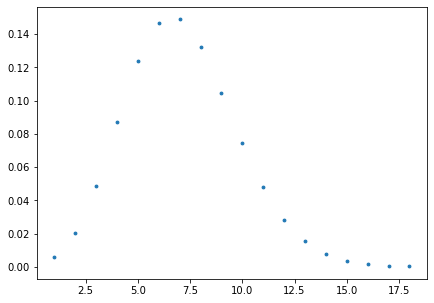

In [22]:
plt.figure(figsize=(7, 5))
plt.scatter(instance_no.index,poisson(instance_no),s=8) #TODO test the difference

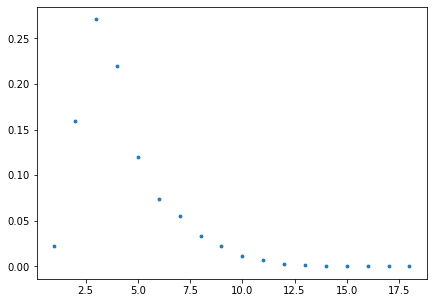

In [23]:
# not bad. But the other distribution - distribution of occurences doesn't look so good
plt.figure(figsize=(7, 5))
plt.scatter(occurance_no.index,occurance_no/occurance_no.sum(),s=8)

In [24]:
# potentially displaced poisson distribution or negative binomial distribution?? (idk I've found it somewhere on the internet)